1 задача

In [44]:
import numpy as np

a = np.random.random((10, 3))
print(a)
b = np.argmin(abs(a-0.5), axis=1)

c = np.arange(10)

print(a[c,b])

[[0.89701793 0.94544592 0.22868732]
 [0.53993869 0.05108416 0.24090899]
 [0.45258292 0.7297026  0.17197041]
 [0.71004115 0.86444912 0.08163985]
 [0.49465084 0.06283476 0.08528694]
 [0.31157206 0.99420332 0.07087596]
 [0.53449113 0.49257003 0.85637192]
 [0.26514799 0.93127361 0.25730654]
 [0.867171   0.27276401 0.02286744]
 [0.03521273 0.39886536 0.22441734]]
[0.22868732 0.53993869 0.45258292 0.71004115 0.49465084 0.31157206
 0.49257003 0.26514799 0.27276401 0.39886536]


2 задача

In [45]:
a = np.random.random((6,6))
print(a)
b = np.argmin(a, axis = 0)
c = np.arange(6)

print(sum(a[c])/a[b[c],c])

[[0.42796235 0.55288507 0.53628801 0.37520064 0.17150764 0.59519386]
 [0.28335444 0.87799954 0.58352133 0.35963572 0.14990691 0.85213559]
 [0.00937544 0.32507779 0.29895949 0.79877405 0.01466201 0.24148989]
 [0.22510016 0.50163066 0.30533979 0.96707468 0.31456031 0.82382432]
 [0.55618458 0.90205478 0.41349665 0.04954406 0.86116007 0.62021075]
 [0.80928327 0.25576541 0.59762053 0.26861177 0.15165803 0.19312644]]
[246.52272885  13.35369502   9.14915202  56.89564302 113.45343781
  17.22177881]


3 задача

In [46]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

c = np.arange(len (x))
mask = x == 0

print(np.max( x[ mask[(c+1) % len(x)] ] ) )


7


4 задача

In [47]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength=len(x))
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5 задача

In [50]:
def findind(Data, centers):
    return np.vectorize(lambda i: np.argmin(np.apply_along_axis(lambda c: np.linalg.norm(Data[i] - c), 1, centers)))(np.arange(Data.shape[0]))   
def findmean(Data, centers, ind):
    return sum(np.apply_along_axis(np.linalg.norm, 0, Data - centers[ind]))
def findcenter(Data,ind,k):
    return np.vectorize(lambda i: np.sum(Data[ind == i]) / (Data[ind == i].shape[0]))(np.arange(k))
def kmeans(Data, k_or_guess,eps = 0.001):
    centers = np.array([])
    k = 0
    if (isinstance(k_or_guess, int) or isinstance(k_or_guess, np.int32)):
        centers = Data[np.random.randint(0, Data.shape[0], k_or_guess)]
        k = k_or_guess
    else:
        centers = Data[k_or_guess]
        k = k_or_guess.shape[0]
        
    ind = findind(Data, centers)
    old_mean = findmean(Data, centers, ind)
    mean = old_mean
    
    while abs(mean - old_mean) > eps:
        old_mean = mean
        centers = findcenter(Data,ind,k)
        ind = findind(Data, centers)
        mean = findmean(Data, centers, ind)
        
    return (centers, mean)

6 задача

K-means для отношения возраста к оценке расходов (1-100)

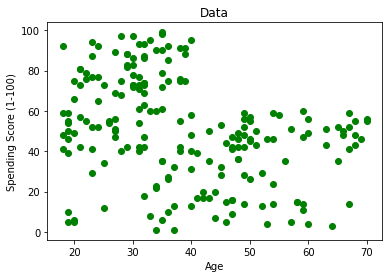

In [51]:
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)

data[:, 2:] = data[:, 2:].astype(int)
plt.scatter(data[:, 2], data[:, 4], c='g')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Data")
plt.show()

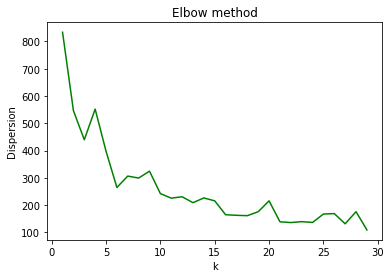

In [58]:
based_data = np.array([data[:, 2], data[:, 4]]).T
elbow = np.vectorize(lambda k: kmeans(based_data, k)[1])(np.arange(1, 30))
plt.plot(np.arange(1, 30), elbow,'g')
plt.xlabel("k")
plt.ylabel("Dispersion")
plt.title("Elbow method")
plt.show()

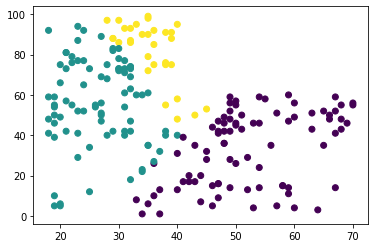

In [59]:
centers_income = kmeans(data_income, 3)[0]
res = findind(based_data, centers_income)
plt.scatter(based_data[:, 0], based_data[:, 1], c = res)
plt.show()

K-means для отношения возраста к годовому доходу (в к$)

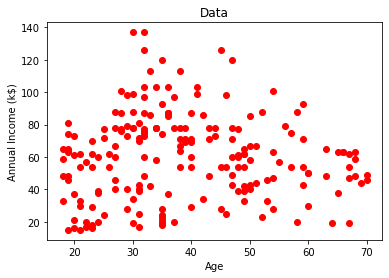

In [54]:
plt.scatter(data[:, 2], data[:, 3], c='r')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Data")
plt.show()

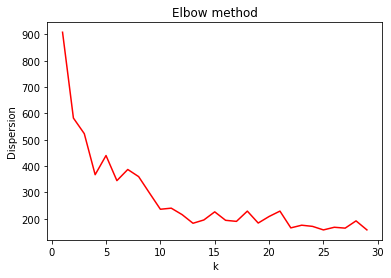

In [60]:
based_data = np.array([data[:, 2], data[:, 3]]).T
elbow = np.vectorize(lambda k: kmeans(based_data, k)[1])(np.arange(1, 30))
plt.plot(np.arange(1, 30), elbow,'r')
plt.xlabel("k")
plt.ylabel("Dispersion")
plt.title("Elbow method")
plt.show()

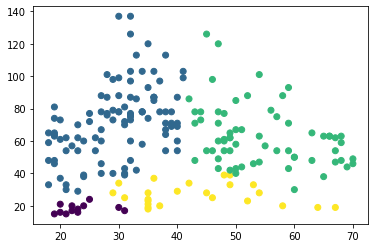

In [64]:
centers_income = kmeans(data_income, 4)[0]
res = findind(based_data, centers_income)
plt.scatter(based_data[:, 0], based_data[:, 1], c = res)
plt.show()